In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correcting the style name
plt.style.use("seaborn-v0_8-whitegrid")

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [3]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 7.6 MB/s eta 0:00:00


In [6]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
print(df.head())

        Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0       Hungary  2005               272.70                 124.27   
1     Singapore  2001                86.72                  60.34   
2       Romania  2016                91.59                  83.36   
3  Cook Islands  2018               280.61                  67.16   
4      Djibouti  2008               179.16                 127.53   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0                 51.95                    94802.83   
1                117.22                    56283.92   
2                121.72                    56256.02   
3                 93.58                    74864.73   
4                121.55                    76862.06   

   Energy_Recovered (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                     158.14                   5.30                 41.11   
1                     498.04                   6.34                 36.44   
2                     4

In [7]:
data = pd.read_csv("/content/Global_Pollution_Analysis.csv", encoding = "ISO-8859-1")
data

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


In [12]:
gdp = data["GDP_Per_Capita (in USD)"]
gdp

,GDP_Per_Capita (in USD)
0,20972.96
1,34850.41
2,57773.15
3,21837.51
4,41379.37
...,...
195,14818.18
196,59238.04
197,28895.94
198,17068.01


In [14]:
del data["GDP_Per_Capita (in USD)"]

In [15]:
data["gdp"] = gdp
data

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),gdp
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [20]:
data.describe().T



,count,mean,std,min,25%,50%,75%,max
Year,200.0,2009.33500,5.765325,2000.00,2004.0000,2010.000,2014.0000,2019.00
Air_Pollution_Index,200.0,180.62695,67.073310,50.30,134.9725,183.385,237.4250,297.95
Water_Pollution_Index,200.0,115.06810,47.580911,31.13,74.5500,112.305,157.4775,199.32
Soil_Pollution_Index,200.0,76.48855,39.692727,11.15,40.8950,78.600,109.2125,149.23
Industrial_Waste (in tons),200.0,52891.68150,27224.491690,1019.37,31201.9725,55299.150,74805.8250,99739.36
Energy_Recovered (in GWh),200.0,260.44870,147.141923,11.73,118.3550,273.140,384.9575,499.98
CO2_Emissions (in MT),200.0,24.87810,14.470892,1.92,11.2200,25.355,38.5500,49.69
Renewable_Energy (%),200.0,27.79970,12.361879,5.04,17.7000,29.170,37.0725,49.56
Plastic_Waste_Produced (in tons),200.0,24492.89355,14421.356002,542.95,12843.8825,24121.540,36516.2325,49852.28
Energy_Consumption_Per_Capita (in MWh),200.0,9.43575,5.575670,0.53,4.5825,9.225,13.9975,19.98


In [21]:
data.isna().sum().sort_values(ascending = False)



,0
Country,0
Year,0
Air_Pollution_Index,0
Water_Pollution_Index,0
Soil_Pollution_Index,0
Industrial_Waste (in tons),0
Energy_Recovered (in GWh),0
CO2_Emissions (in MT),0
Renewable_Energy (%),0
Plastic_Waste_Produced (in tons),0


In [22]:
for i in data.columns:

    if data[i].isna().sum() > (len(data) / 2):
        del data[i]

data

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),gdp
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


In [23]:
data.isna().sum().sort_values(ascending = False)

,0
Country,0
Year,0
Air_Pollution_Index,0
Water_Pollution_Index,0
Soil_Pollution_Index,0
Industrial_Waste (in tons),0
Energy_Recovered (in GWh),0
CO2_Emissions (in MT),0
Renewable_Energy (%),0
Plastic_Waste_Produced (in tons),0


In [24]:
def mode_imputition(i):

    data[i] = data[i].fillna(data[i].mode()[0])
    return data[i]

for i in data.select_dtypes(include = "object").columns:
    mode_imputition(i)

################################################################################

def median_imputition(i):

    data[i] = data[i].fillna(data[i].median())
    return data[i]

for i in data.select_dtypes(include = "number").columns:
    median_imputition(i)

In [26]:
df = data.iloc[:,:]
df

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),gdp
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


In [27]:
df = df.iloc[:,2:]
df

,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),gdp
0,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...
195,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


**EDA**

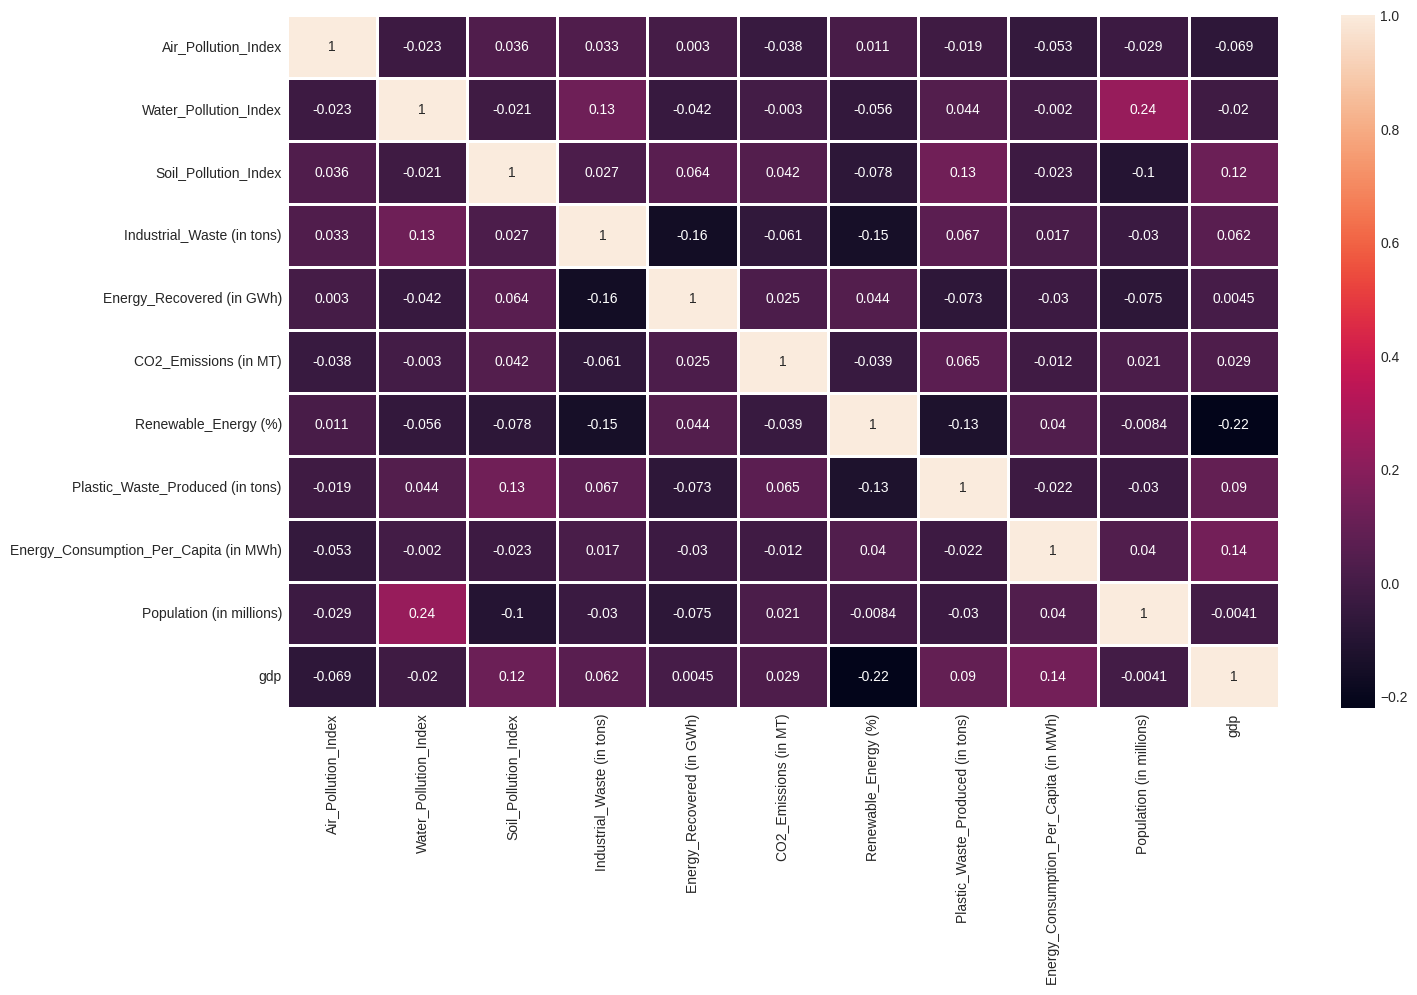

In [28]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(), annot = True, linewidths = 1)
plt.show()

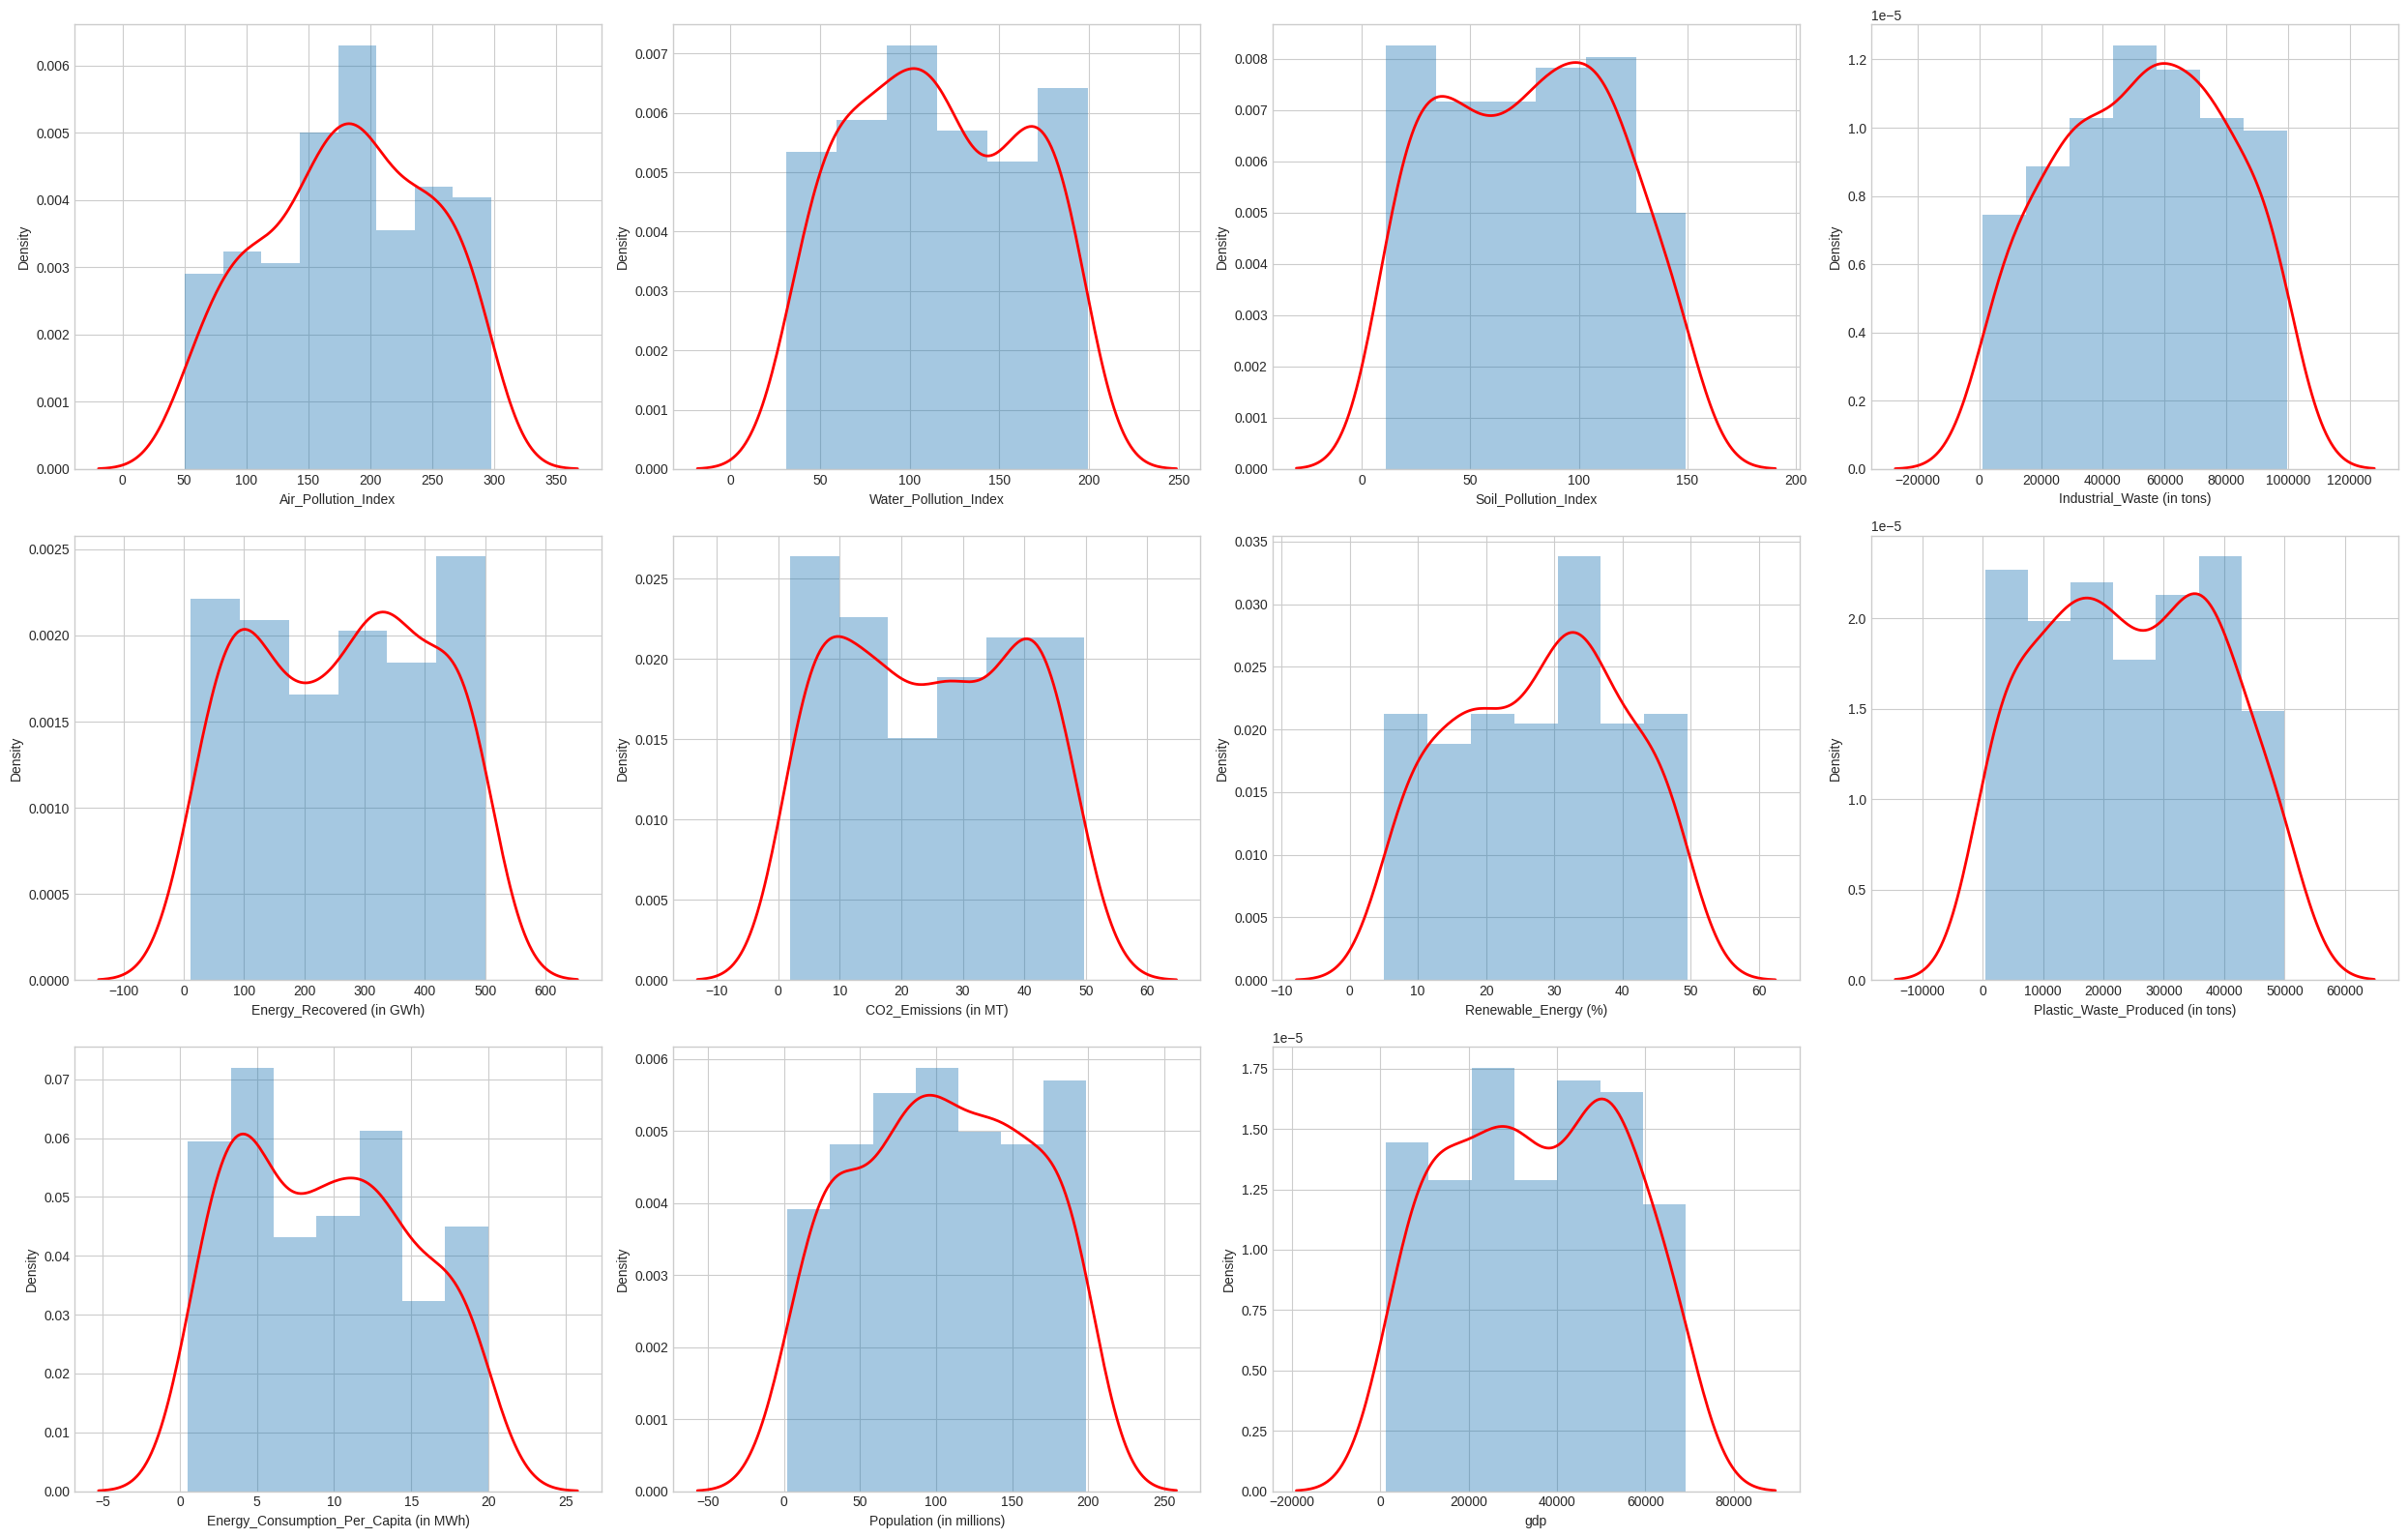

In [29]:
plt.figure(figsize = (25,16))

for i,j in enumerate(df.select_dtypes(include = "number").columns):
    plt.subplot(3,4,i+1)

    sns.distplot(df[j], kde_kws = {"color":"red", "lw":2})

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

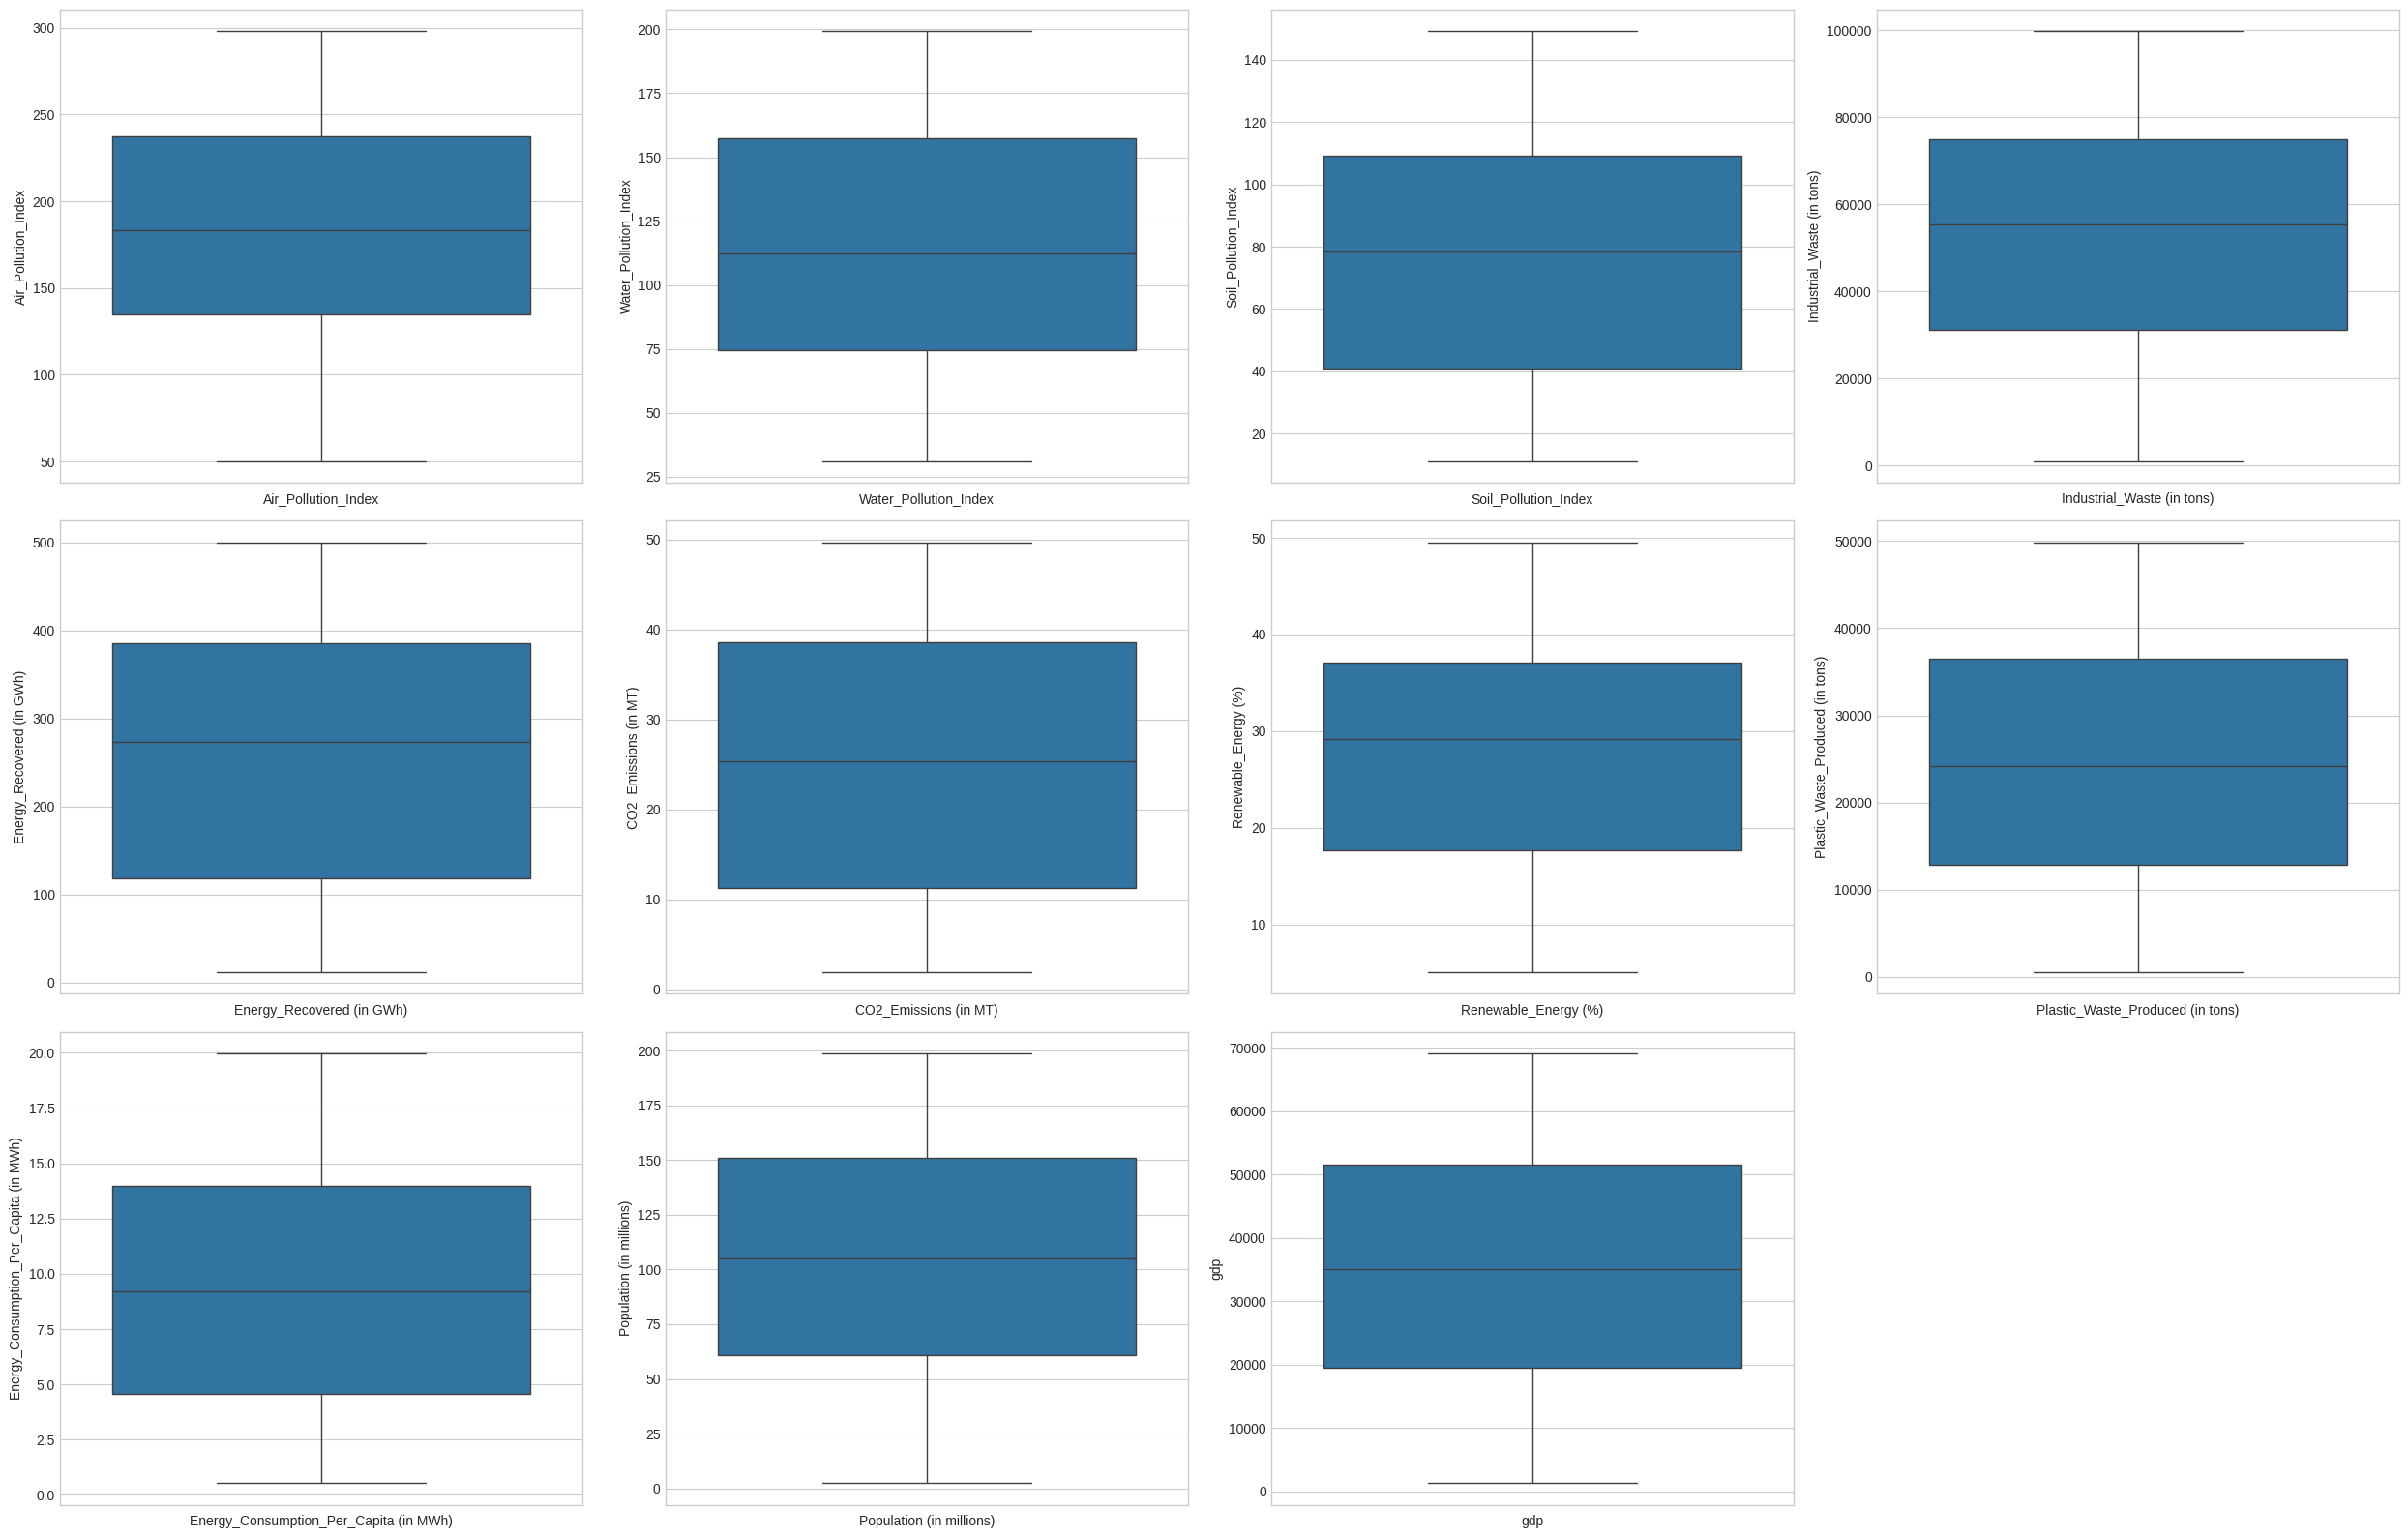

In [30]:
plt.figure(figsize = (25,16))

for i,j in enumerate(df.select_dtypes(include = "number").columns):
    plt.subplot(3,4,i+1)

    sns.boxplot(df[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

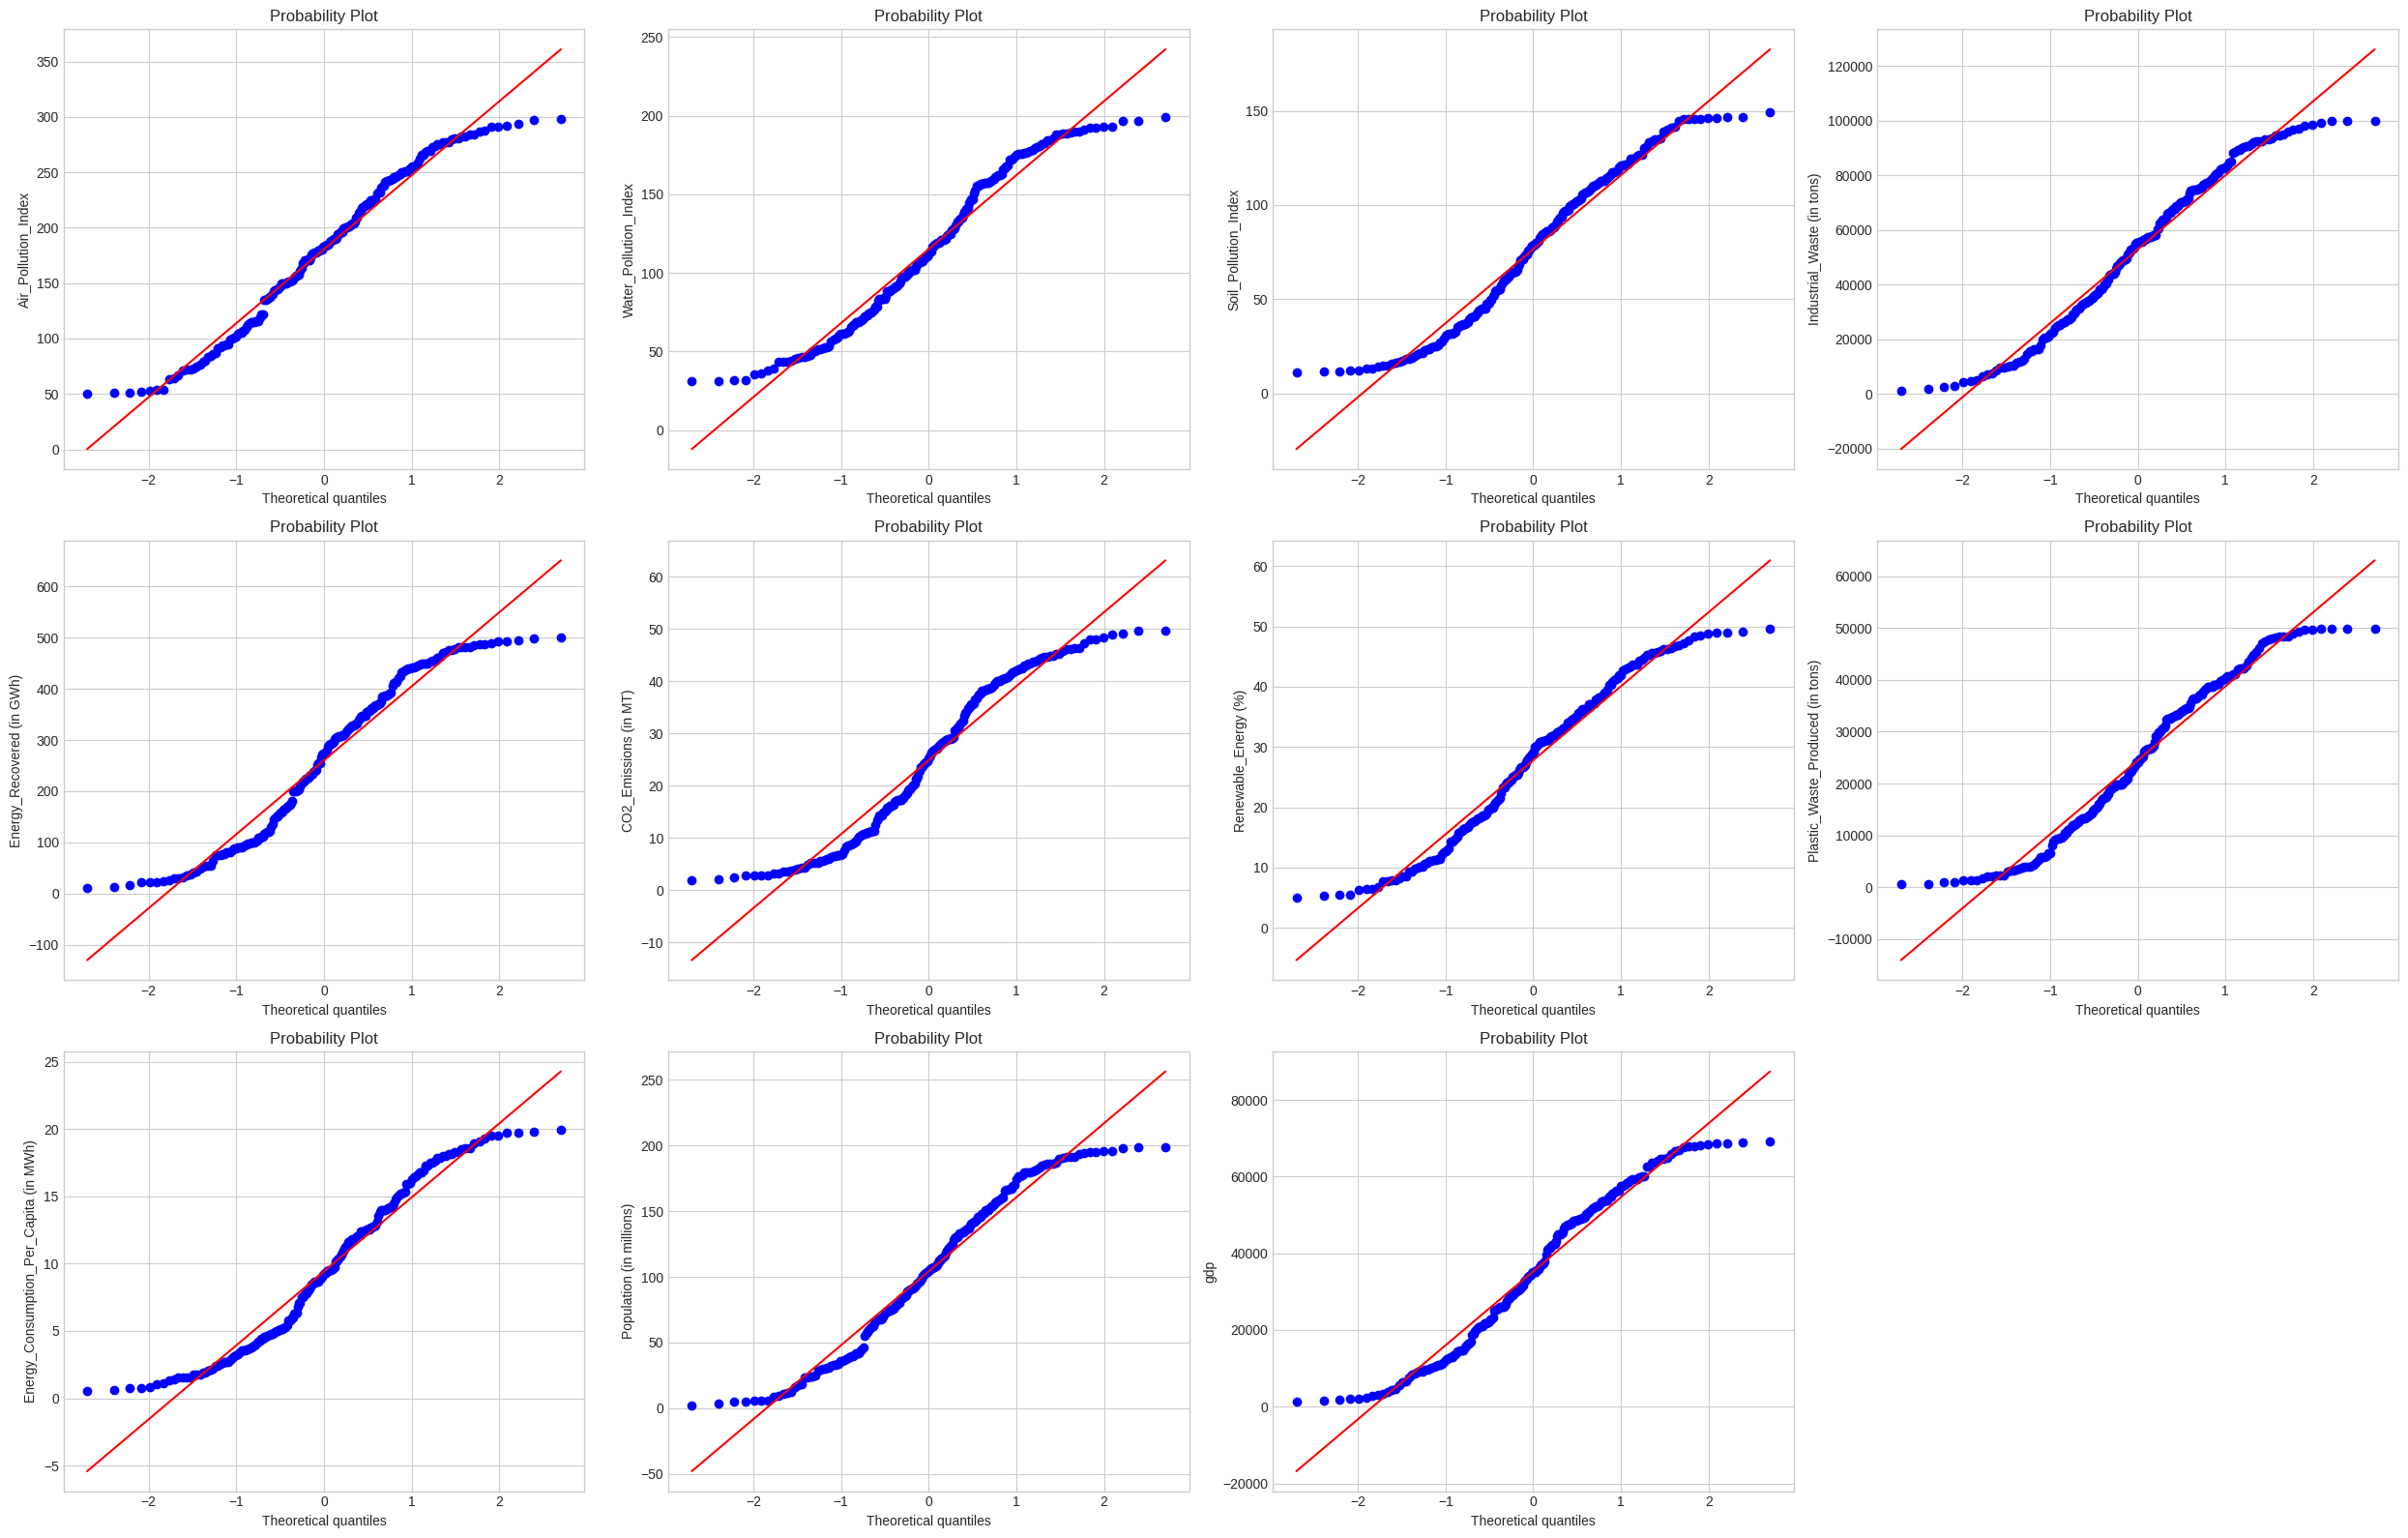

In [31]:
plt.figure(figsize = (25,16))

for i,j in enumerate(df.select_dtypes(include = "number").columns):
    plt.subplot(3,4,i+1)

    stats.probplot(df[j], dist = "norm", plot = plt)
    plt.ylabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

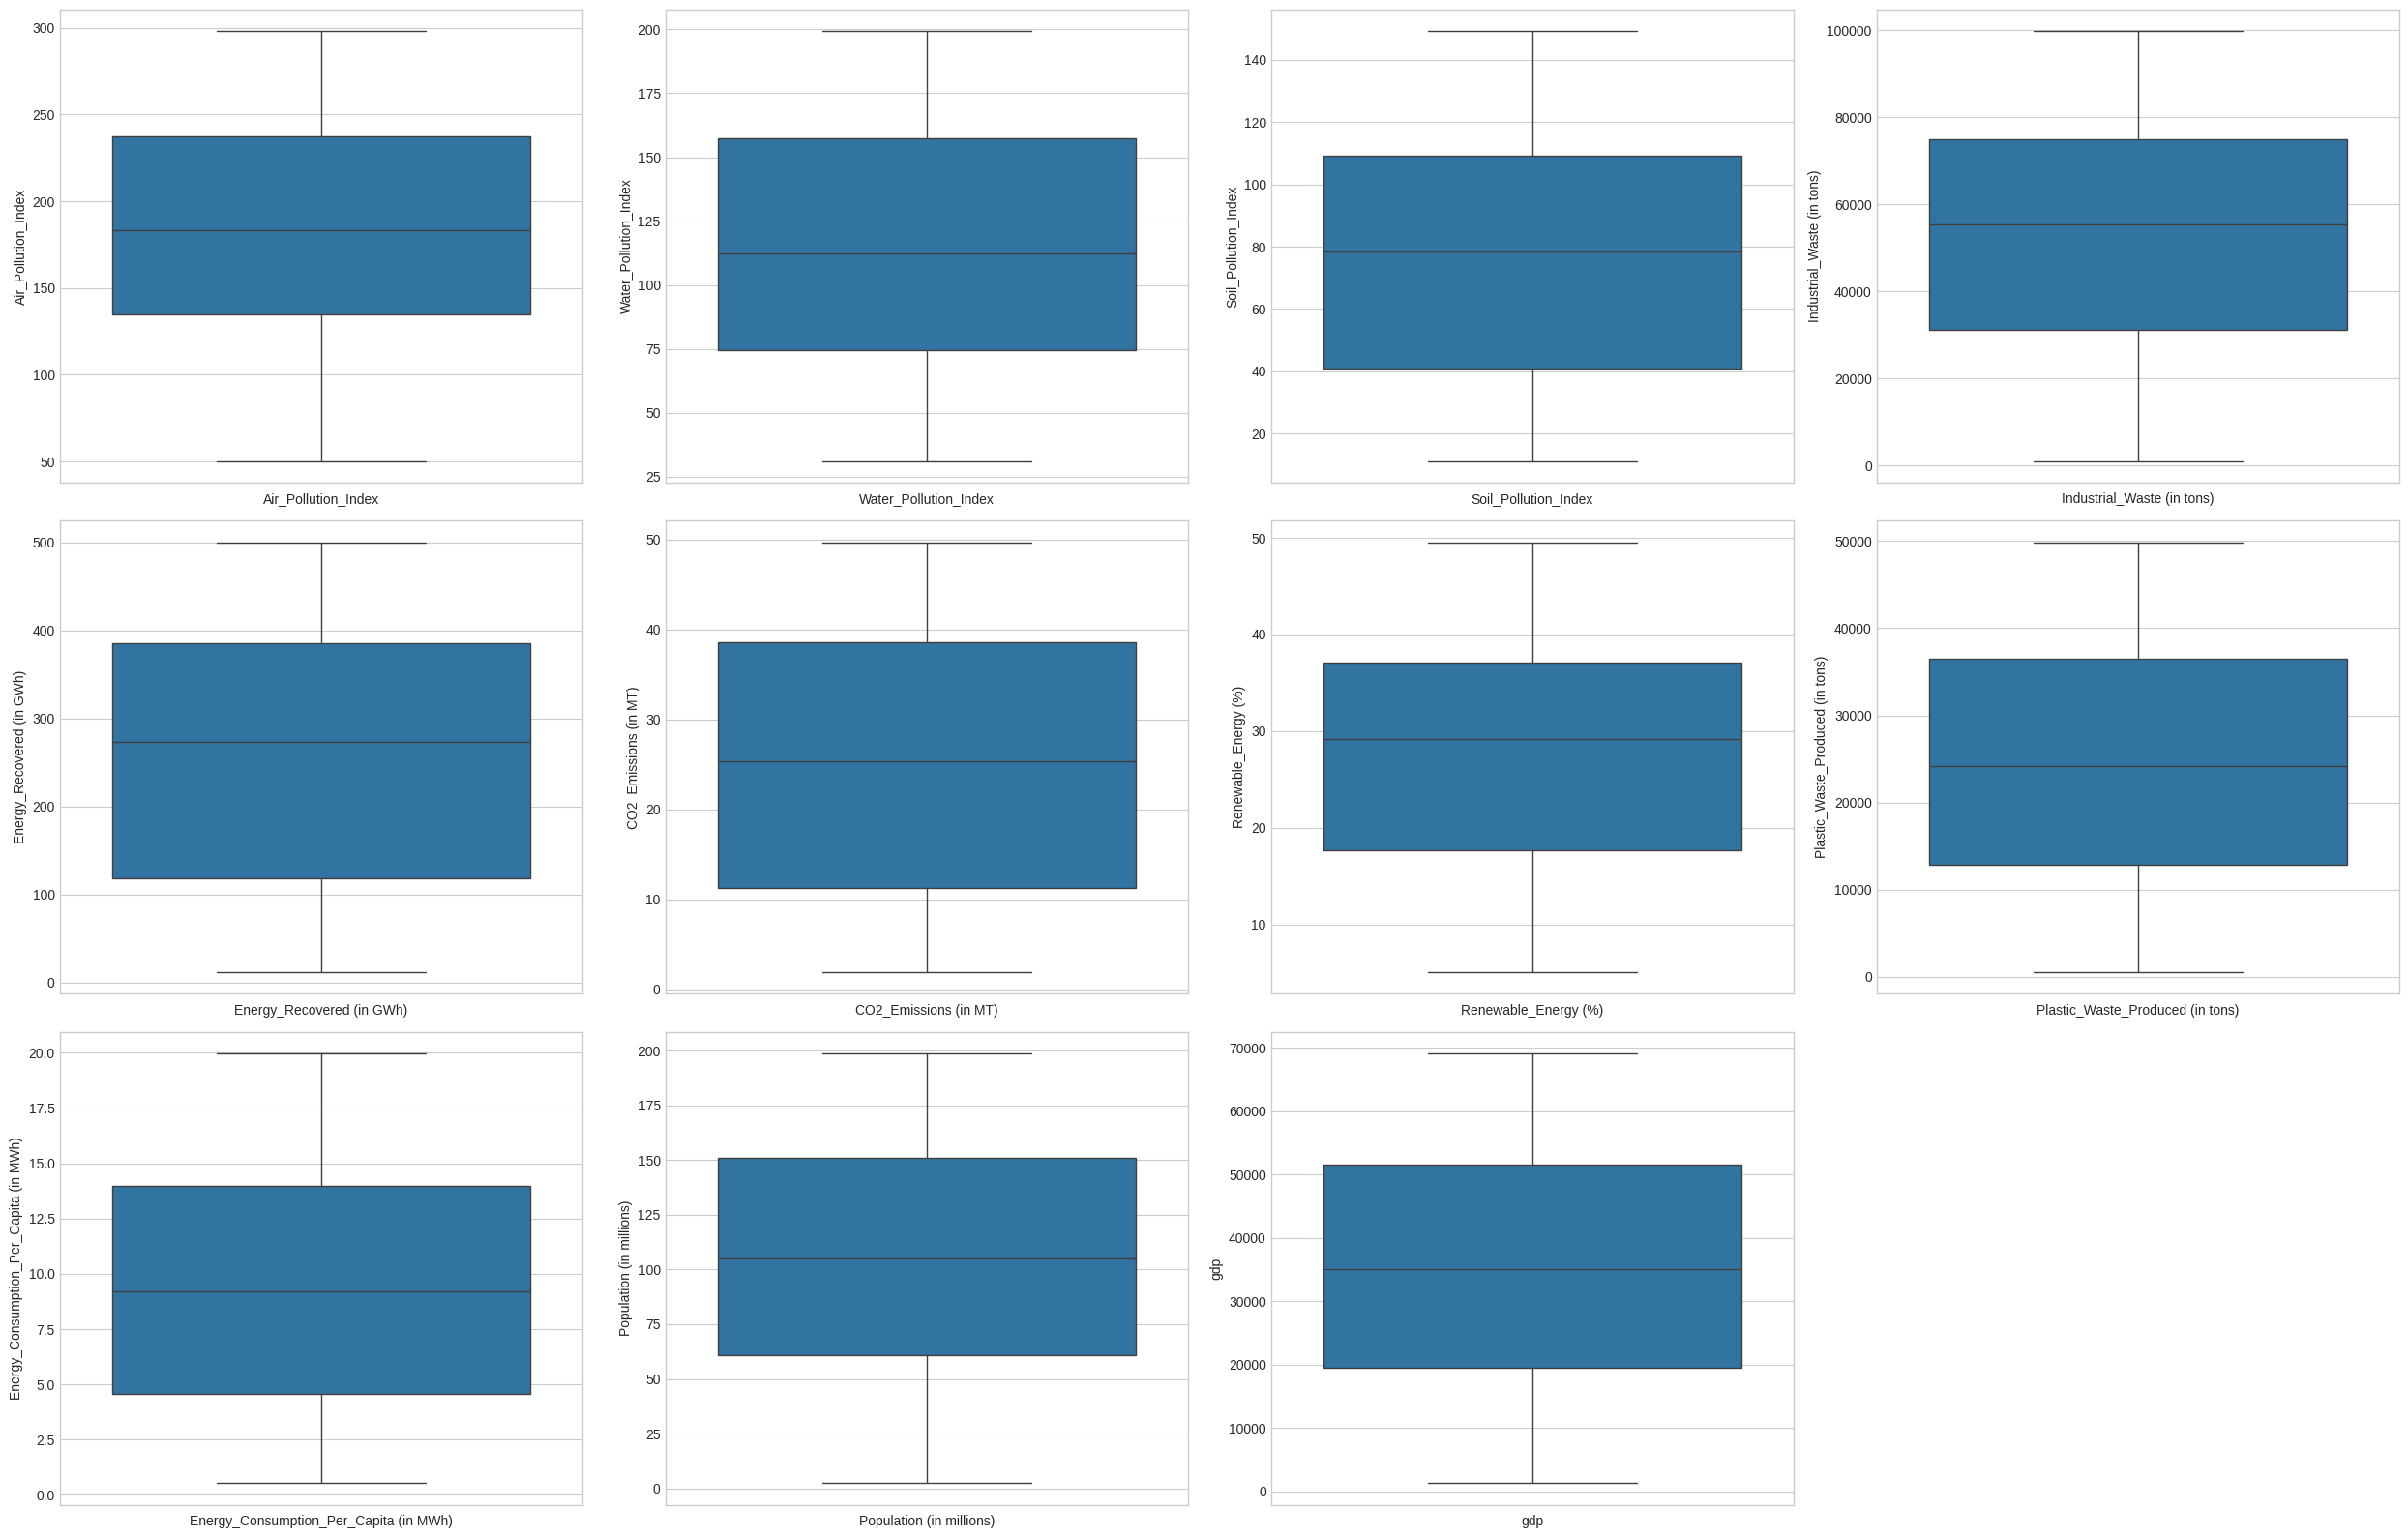

In [33]:
def outliers_treatment(i):
    winsor = Winsorizer(capping_method = "gaussian",
                        tail = "both",
                        fold = 3,
                        variables = [i])

    df[i] = winsor.fit_transform(df[[i]])
    return df[i]

# Exclude 'Year' from outlier treatment
for i in df.select_dtypes(include = "number").columns:
    outliers_treatment(i)

#####################################################################################

plt.figure(figsize = (25,16))

for i,j in enumerate(df.select_dtypes(include = "number").columns):
    plt.subplot(3,4,i+1)

    sns.boxplot(df[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

**Model Building through OneHotEncoder & MinMaxScaler**

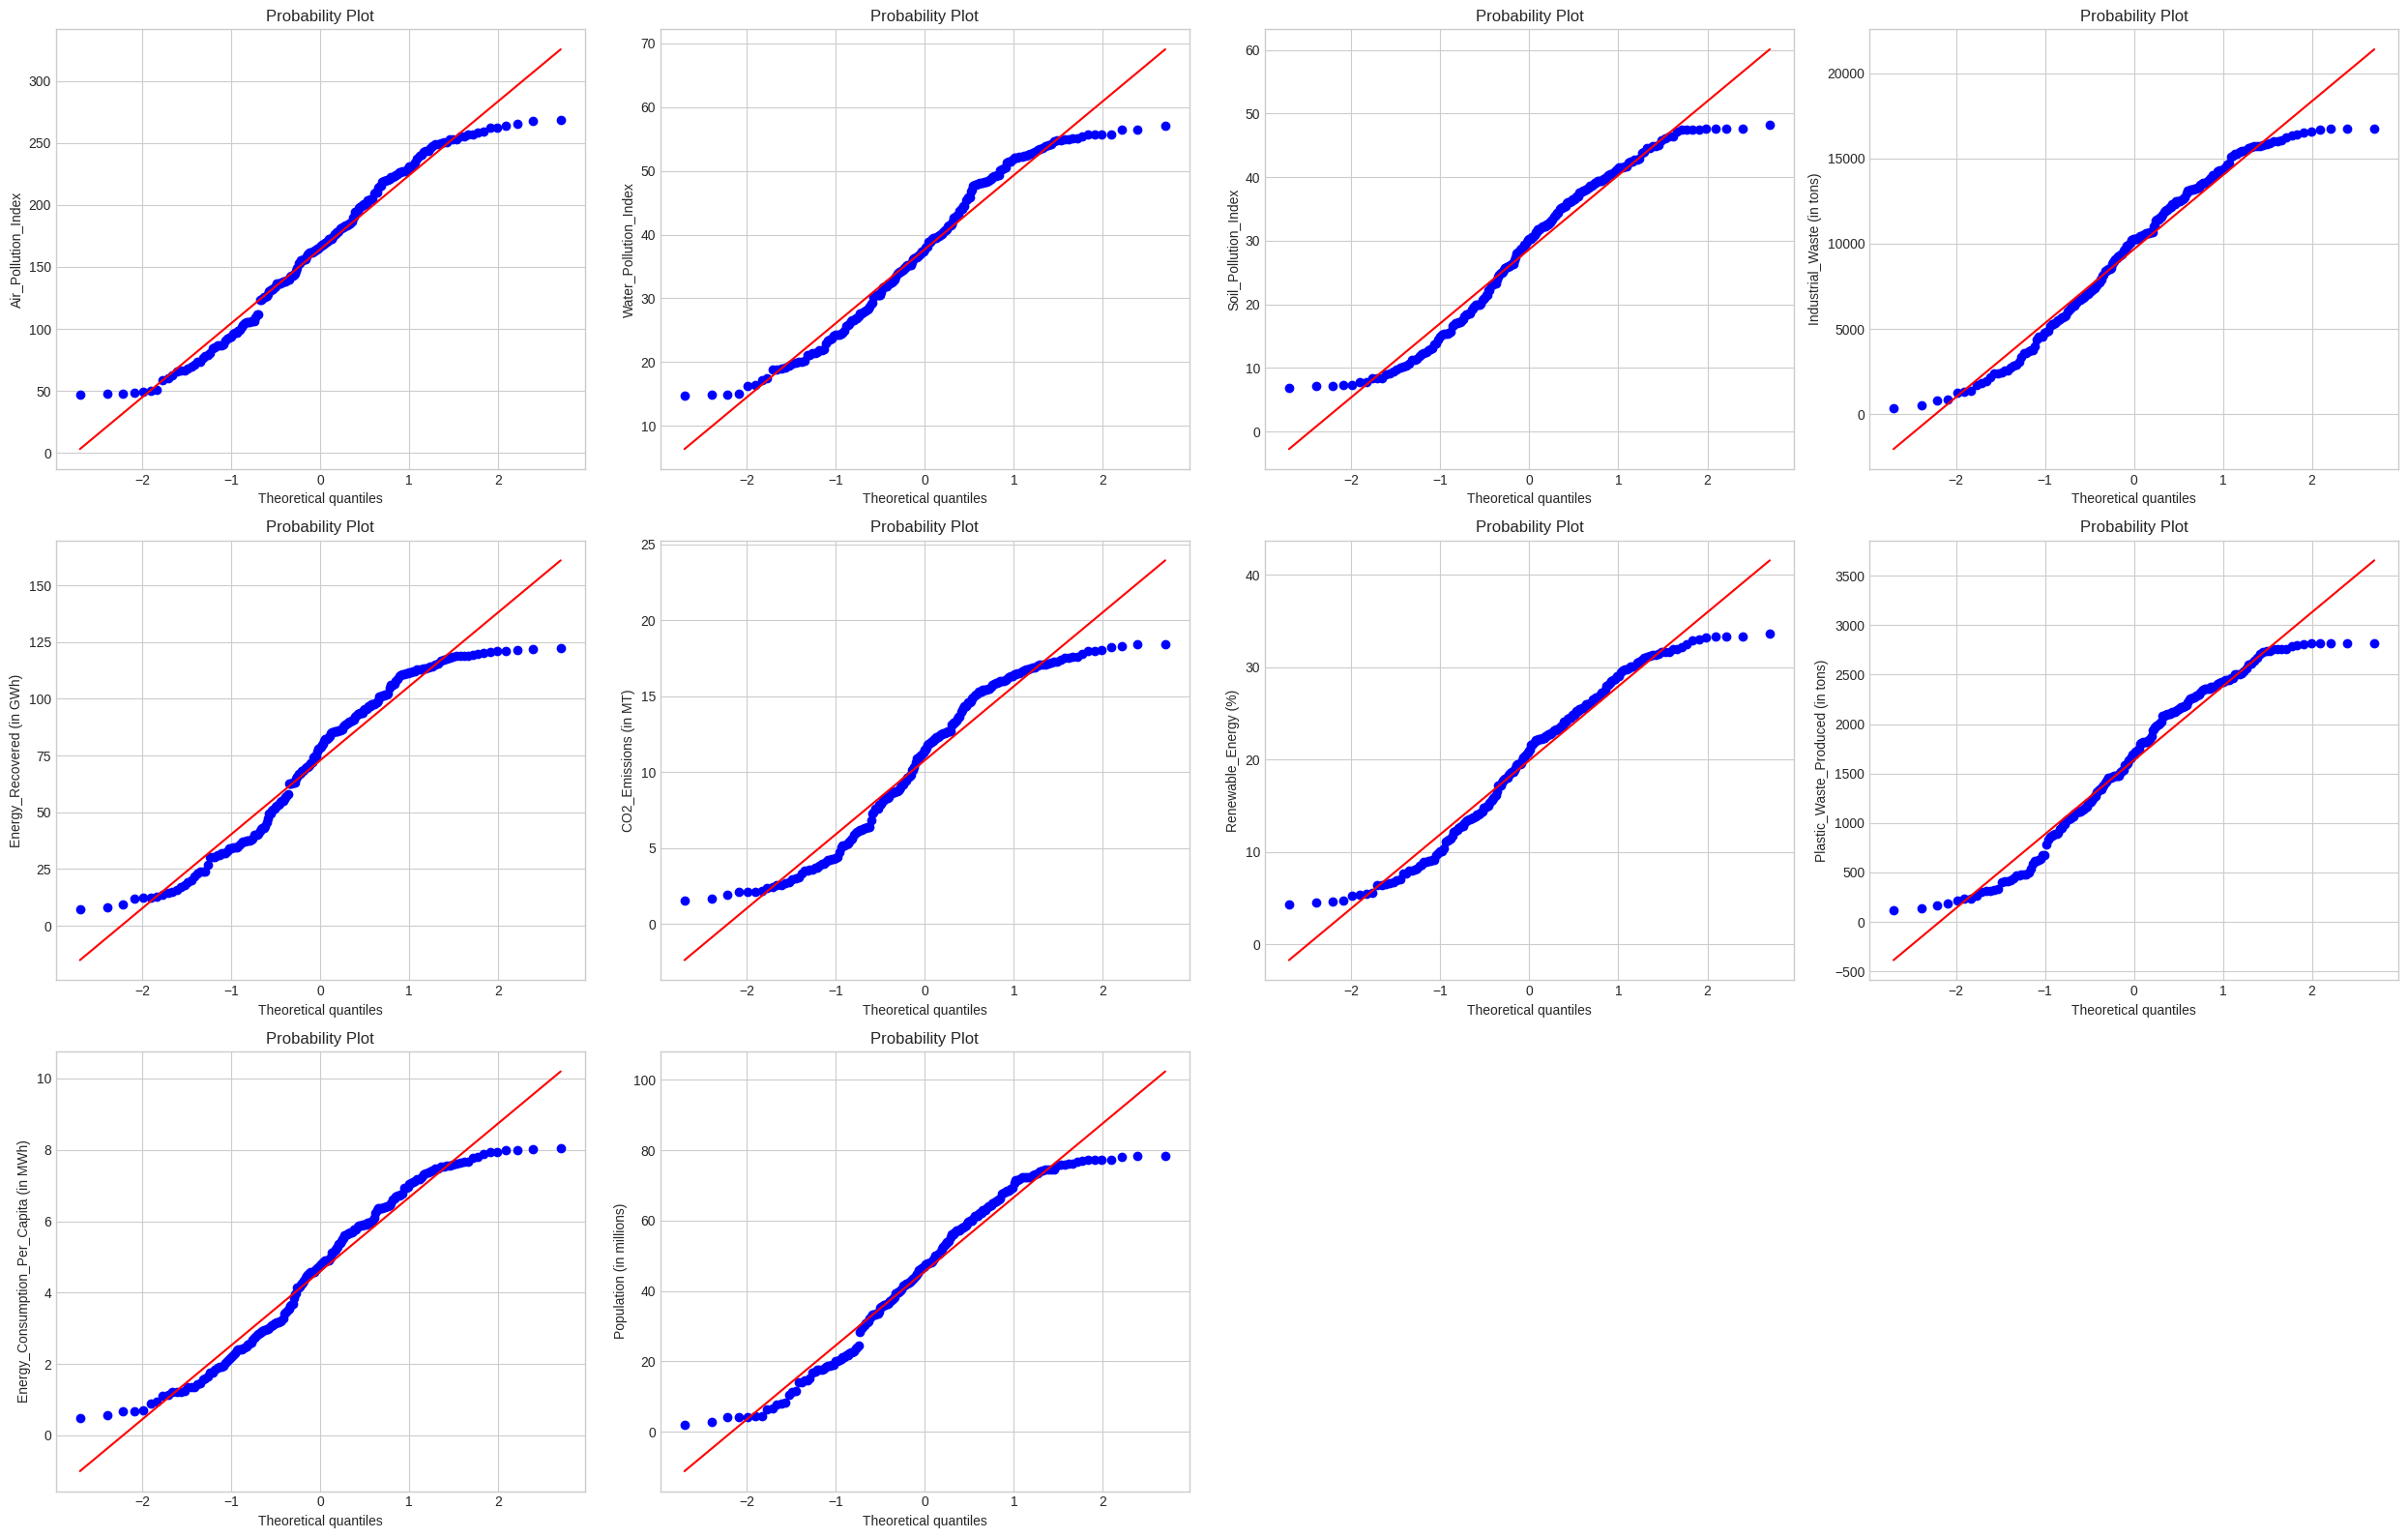

In [34]:
def transformation(i):
    fitted_value, fitted_lambda = stats.yeojohnson(df[i])
    df[i] = fitted_value
    return df[i]

for i in df.select_dtypes(include = "number").iloc[:,:-1].columns:
    transformation(i)

###########################################################################

plt.figure(figsize = (25,16))

for i,j in enumerate(df.select_dtypes(include = "number").iloc[:,:-1].columns):
    plt.subplot(3,4,i+1)

    stats.probplot(df[j], dist = "norm", plot = plt)
    plt.ylabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()


**Scaling**

In [35]:
scale_data = pd.DataFrame(MinMaxScaler().fit_transform(df.loc[:, df.select_dtypes(include = "number").iloc[:,:-1].columns]),
                            columns = [df.select_dtypes(include = "number").iloc[:,:-1].columns])
scale_data["gdp"] = df["gdp"]
scale_data

,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),gdp
0,0.899370,0.612121,0.371129,0.957862,0.393920,0.119489,0.825535,0.804205,0.717839,0.273438,20972.96
1,0.149794,0.220047,0.811823,0.613759,0.996988,0.151265,0.727179,0.739741,0.358260,0.739794,34850.41
2,0.169704,0.371130,0.839092,0.613497,0.983705,1.000000,0.112584,0.482769,0.742432,0.682820,57773.15
3,0.930915,0.266348,0.663232,0.783558,0.365957,0.223761,0.342302,0.274626,0.026488,0.411512,21837.51
4,0.524603,0.630211,0.838068,0.801349,0.101718,0.371817,0.675158,0.838520,0.729568,0.949629,41379.37
...,...,...,...,...,...,...,...,...,...,...,...
195,0.268523,0.341979,0.295203,0.549506,0.215718,0.105184,0.305458,0.135976,0.418280,0.536407,14818.18
196,0.292819,0.593665,0.460560,0.782040,0.054236,0.946374,0.286294,0.801417,0.823793,0.635276,59238.04
197,0.405883,0.735121,0.251261,0.030328,0.656596,0.821225,0.767801,0.593860,0.781505,0.935330,28895.94
198,0.757538,0.552068,0.717014,0.728546,0.678663,0.653089,0.635831,0.043146,0.712780,0.264450,17068.01


Feature **Engineering**

In [42]:
# Yearly Trends
yearly_data = data.groupby('Year').mean(numeric_only=True).reset_index()

# Energy Consumption per Capita
data['Energy_Consumption_per_Capita'] = data['Energy_Consumption_Per_Capita (in MWh)'] / data['Population (in millions)']

Linear Regression Model (for Pollution Prediction)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features & Target
X = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']]
y = df['Energy_Recovered (in GWh)']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: -0.033252104233894686
MSE: 1312.9535543431243
MAE: 32.14819416149062


Logistic Regression Model (Pollution Severity Classification)

Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        16

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



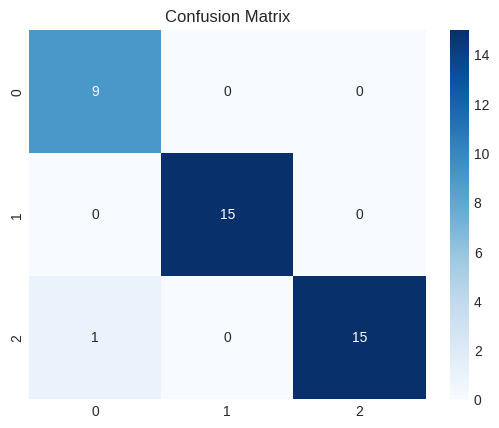

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a severity label
# Adjusting bins based on data distribution
bins = df['Air_Pollution_Index'].quantile([0, 0.33, 0.66, 1]).tolist()
labels = ['Low', 'Medium', 'High']
df['Pollution_Severity'] = pd.cut(df['Air_Pollution_Index'], bins=bins, labels=labels, include_lowest=True)


# Encode target
le_severity = LabelEncoder()
df['Severity_Label'] = le_severity.fit_transform(df['Pollution_Severity'])

# Features & Target
X = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)']]
y = df['Severity_Label']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

**Model** Comparison and Visualization

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score

# Retrain the linear regression model with the same features as the logistic regression model for comparison
lr_model_comparison = LinearRegression()
X_comparison = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)']]
y_regression = df['Energy_Recovered (in GWh)'] # Target for linear regression
X_train_comparison, X_test_comparison, y_train_regression, y_test_regression = train_test_split(X_comparison, y_regression, test_size=0.2, random_state=42)

lr_model_comparison.fit(X_train_comparison, y_train_regression)

# Summary of both models using the same test set for comparison
print("Linear Regression R² (on comparison features):", r2_score(y_test_regression, lr_model_comparison.predict(X_test_comparison)))

# Use the X_test and y_test from the logistic regression split (from cell DYpJ8Hl8i1ft) for logistic regression evaluation
# Note: The y_test here is the Severity_Label
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_model.predict(X_test)))

Linear Regression R² (on comparison features): -0.08365114118085382
Logistic Regression Accuracy: 0.975
